# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10.5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

$$
    d_w Q(w) = \dfrac{1}{\ell} d_w(\left( y - Xw \right)^T \left( y - Xw \right)) = \dfrac{1}{\ell} (d_w[(y-Xw)^T](y-Xw) + (y-Xw)^Td_w[(y-Xw)]) = \dfrac{1}{\ell} (d_w[(-Xw)^T](y-Xw) - (y-Xw)^TXdw) = \dfrac{1}{\ell}(-dw^TX^T(y-Xw) - (y-Xw)^TXdw)= -\dfrac{2}{\ell}(y-Xw)^TXdw
$$

$$
  \nabla_w Q(w) = -\dfrac{2}{\ell} (y-Xw)^TX
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [17]:
from dataclasses import dataclass
from enum import auto
from enum import Enum
from typing import Dict
from typing import Type

import numpy as np


@dataclass
class LearningRate:
    lambda_: float = 1e-3
    s0: float = 1
    p: float = 0.5

    iteration: int = 0

    def __call__(self):
        """
        Calculate learning rate according to lambda (s0/(s0 + t))^p formula
        """
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p


class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

In [18]:
class BaseDescent:
    """
    A base class and templates for all functions
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        """
        :param dimension: feature space dimension
        :param lambda_: learning rate parameter
        :param loss_function: optimized loss function
        """
        self.w: np.ndarray = np.random.rand(dimension)
        self.lr: LearningRate = LearningRate(lambda_=lambda_)
        self.loss_function: LossFunction = loss_function

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.update_weights(self.calc_gradient(x, y))

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Template for update_weights function
        Update weights with respect to gradient
        :param gradient: gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        pass

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Template for calc_gradient function
        Calculate gradient of loss function with respect to weights
        :param x: features array
        :param y: targets array
        :return: gradient: np.ndarray
        """
        pass

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate loss for x and y with our weights
        :param x: features array
        :param y: targets array
        :return: loss: float
        """
        # TODO: implement loss calculation function
        loss = np.dot((y - np.dot(x, self.w)).T, (y - np.dot(x, self.w))) / len(y)
        return loss

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Calculate predictions for x
        :param x: features array
        :return: prediction: np.ndarray
        """
        # TODO: implement prediction function
        prediction = np.dot(x, self.w)
        return prediction

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

In [19]:
class VanillaGradientDescent(BaseDescent):
    """
    Full gradient descent class
    """

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        # TODO: implement updating weights function
        weight_diff = -self.lr()*gradient
        self.w += weight_diff
        return weight_diff

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        # TODO: implement calculating gradient function
        gradient = -2/len(y) * (y-x.dot(self.w)).T.dot(x)
        return gradient

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

In [20]:
class StochasticDescent(VanillaGradientDescent):
    """
    Stochastic gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 loss_function: LossFunction = LossFunction.MSE):
        """
        :param batch_size: batch size (int)
        """
        super().__init__(dimension, lambda_, loss_function)
        self.batch_size = batch_size

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        # TODO: implement calculating gradient function
        batch_indices = np.random.randint(len(y), size=self.batch_size)
        x_batch = x[batch_indices]
        y_batch = y[batch_indices]
        np.dot((y - np.dot(x, self.w)).T, (y - np.dot(x, self.w))) / len(y)

        gradient = -2 * np.dot((y_batch-np.dot(x_batch, self.w)).T, x_batch) / len(y_batch)
        return gradient

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

In [21]:
class MomentumDescent(VanillaGradientDescent):
    """
    Momentum gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.alpha: float = 0.9

        self.h: np.ndarray = np.zeros(dimension)

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        # TODO: implement updating weights function
        self.h = self.alpha * self.h + self.lr() * gradient
        weight_diff = -self.h
        self.w += weight_diff
        return weight_diff

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](https://github.com/esokolov/ml-course-hse/blob/master/2023-fall/homeworks-practice/homework-practice-03-gd/adam_meme.png?raw=1)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

In [22]:
class Adam(VanillaGradientDescent):
    """
    Adaptive Moment Estimation gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.eps: float = 1e-8

        self.m: np.ndarray = np.zeros(dimension)
        self.v: np.ndarray = np.zeros(dimension)

        self.beta_1: float = 0.9
        self.beta_2: float = 0.999

        self.iteration: int = 0

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        # TODO: implement updating weights function
        self.m = self.beta_1 * self.m + (1-self.beta_1) * gradient
        self.v = self.beta_2 * self.v + (1-self.beta_2) * np.square(gradient)

        m_hat = self.m/(1- np.power(self.beta_1, self.iteration + 1))
        v_hat = self.v/(1- np.power(self.beta_2, self.iteration + 1))

        self.iteration += 1

        w_old = self.w.copy()
        self.w = w_old - self.lr() * m_hat / (np.sqrt(v_hat) + self.eps)
        weight_diff = self.w - w_old

        return weight_diff

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [23]:

from __future__ import annotations

from typing import List

import numpy as np

from descents import BaseDescent
from descents import get_descent


class LinearRegression:
    """
    Linear regression class
    """

    def __init__(self, descent_config: dict, tolerance: float = 1e-4, max_iter: int = 300):
        """
        :param descent_config: gradient descent config
        :param tolerance: stopping criterion for square of euclidean norm of weight difference (float)
        :param max_iter: stopping criterion for iterations (int)
        """
        self.descent: BaseDescent = get_descent(descent_config)

        self.tolerance: float = tolerance
        self.max_iter: int = max_iter

        self.loss_history: List[float] = []

    def fit(self, x: np.ndarray, y: np.ndarray) -> LinearRegression:
        """
        Fitting descent weights for x and y dataset
        :param x: features array
        :param y: targets array
        :return: self
        """
        # TODO: fit weights to x and y

        for iteration in range(self.max_iter):
          loss = self.descent.calc_loss(x, y)
          self.loss_history.append(loss)

          gradient = self.descent.calc_gradient(x, y)
          weight_diff = self.descent.update_weights(gradient)

          if np.sum(np.square(weight_diff)) < self.tolerance:
            break
          elif np.isnan(weight_diff).any():
            break

        loss = self.descent.calc_loss(x, y)
        self.loss_history.append(loss)

        return self

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predicting targets for x dataset
        :param x: features array
        :return: prediction: np.ndarray
        """
        return self.descent.predict(x)

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculating loss for x and y dataset
        :param x: features array
        :param y: targets array
        """
        return self.descent.calc_loss(x, y)

## Задание 3. Проверка кода (0 баллов)

In [24]:
%load_ext autoreload

In [25]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [26]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [27]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [28]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/96775181/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/96775205/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/96775226/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/96775243/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/96739417/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [30]:
data = pd.read_csv('autos.csv')

In [31]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

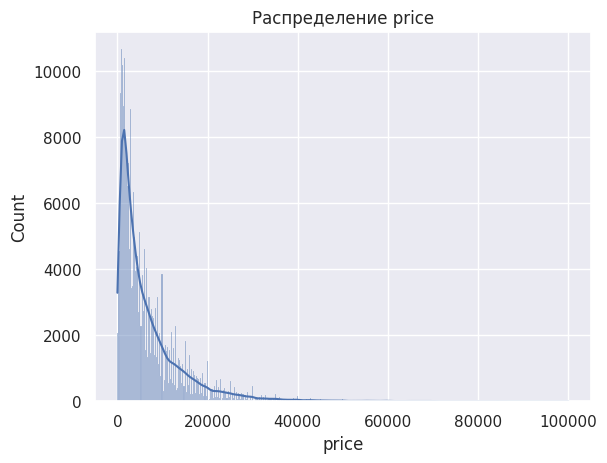

In [32]:
# YOUR CODE (EDA):
sns.histplot(data['price'], kde=True)
plt.title('Распределение price');

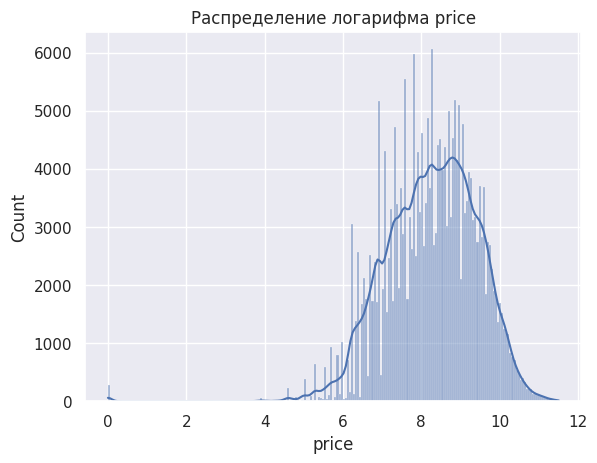

In [33]:
sns.histplot(np.log(data['price']), kde=True)
plt.title('Распределение логарифма price');

Логарифм price больше похож на нормальное распределение, с которым удобно работать, поэтому можно заменить целевую переменную на него

Выбросы есть, их можно убрать, например, взяв квантиль

In [34]:
data['log_price'] = np.log(data['price'])

In [35]:
quant = data['log_price'].quantile(0.01)
data = data[data['log_price'] >= quant]
quant = data['log_price'].quantile(0.99)
data = data[data['log_price'] <= quant]

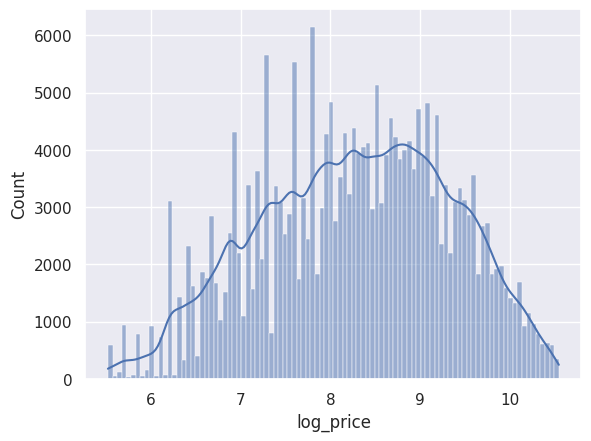

In [36]:
sns.histplot(data['log_price'], kde=True);

Теперь график без выбросов и похож на нормальное распределение

In [37]:
data.isnull().any()

brand                False
model                False
vehicleType          False
gearbox              False
fuelType             False
notRepairedDamage    False
powerPS              False
kilometer            False
autoAgeMonths        False
price                False
log_price            False
dtype: bool

NaN нет

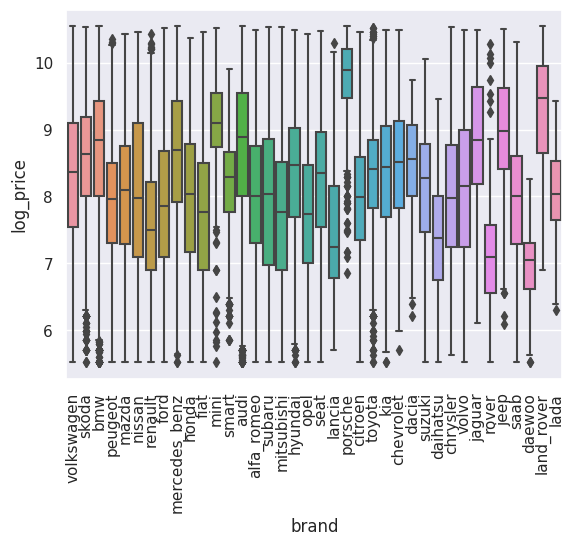

In [38]:
sns.boxplot(x = data['brand'], y = data['log_price'])
plt.xticks(rotation=90);

Цена варьируется в зависимости от бренда

<ipython-input-39-ad1d863a0fcb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_model_log_price = data.groupby('model')[['model', 'log_price']].mean()


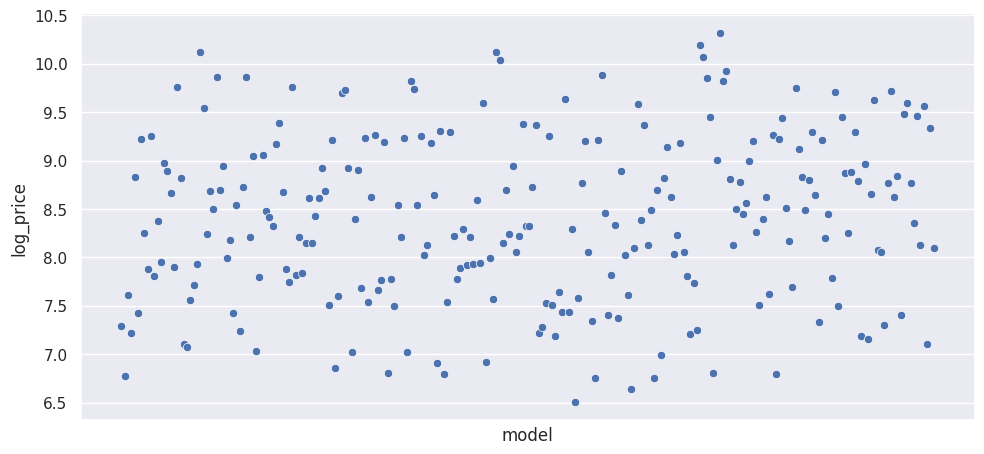

In [39]:
mean_model_log_price = data.groupby('model')[['model', 'log_price']].mean()
sns.relplot(data = mean_model_log_price, x = 'model', y = 'log_price', aspect = 2)
plt.xticks([]);

По графику видно, что цена от модели не зависит

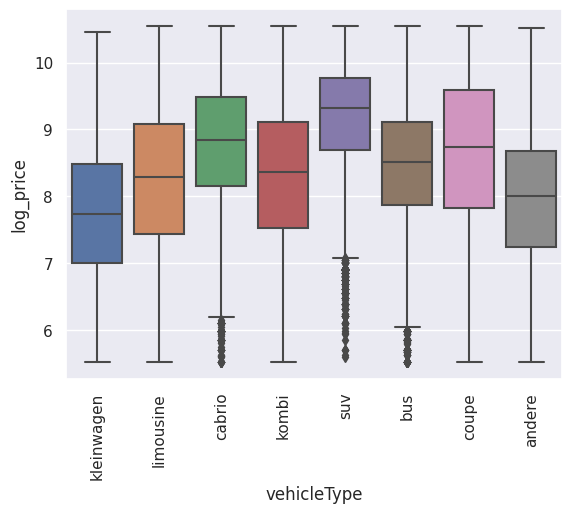

In [40]:
sns.boxplot(x = data['vehicleType'], y = data['log_price'])
plt.xticks(rotation=90);

Цена зависит от vehicleType

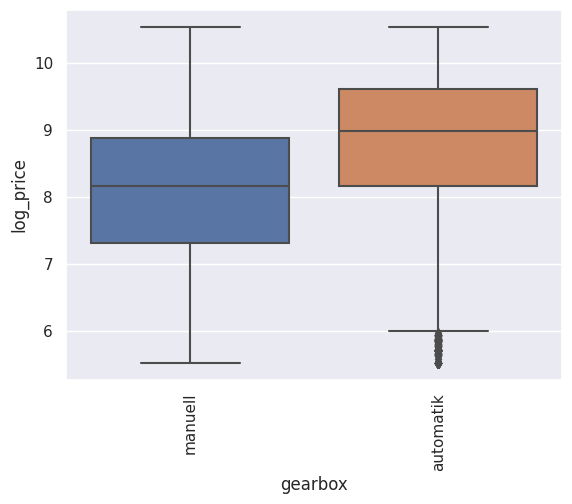

In [41]:
sns.boxplot(x = data['gearbox'], y = data['log_price'])
plt.xticks(rotation=90);

Аналогично

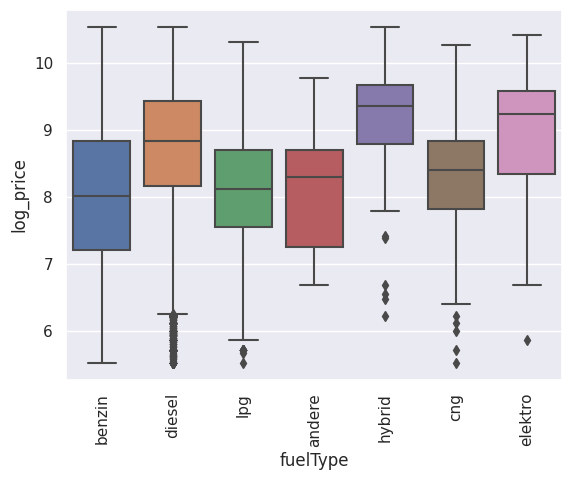

In [42]:
sns.boxplot(x = data['fuelType'], y = data['log_price'])
plt.xticks(rotation=90);

Аналогично

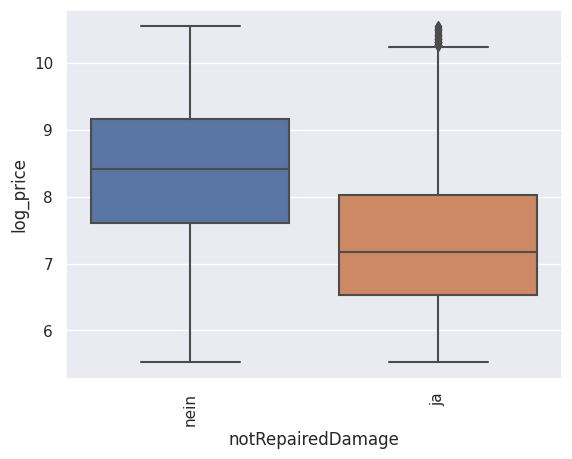

In [43]:
sns.boxplot(x = data['notRepairedDamage'], y = data['log_price'])
plt.xticks(rotation=90);

Сильная разница

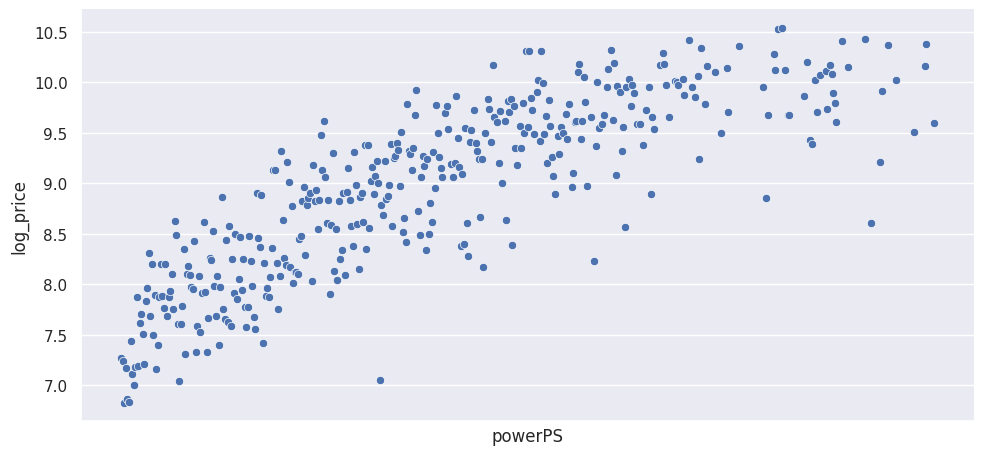

In [44]:
mean_power_log_price = data.groupby('powerPS')[['powerPS', 'log_price']].mean()
sns.relplot(data = mean_power_log_price, x = 'powerPS', y = 'log_price', aspect = 2)
plt.xticks([]);

Есть зависимость, близкая к степенной (корень) и даже к линейной

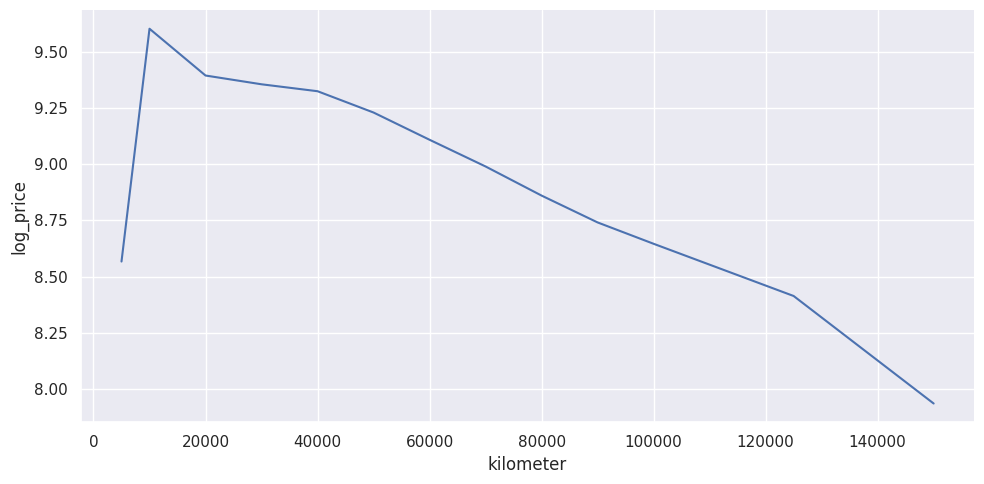

In [45]:
mean_km_log_price = data.groupby('kilometer')[['kilometer', 'log_price']].mean()
sns.relplot(data = mean_km_log_price, x = 'kilometer', y = 'log_price', aspect = 2, kind = 'line');

Есть обратная зависимость, однако до 10000 км есть аномалия, её можно убрать

In [46]:
data = data[data['kilometer'] >= 10000]

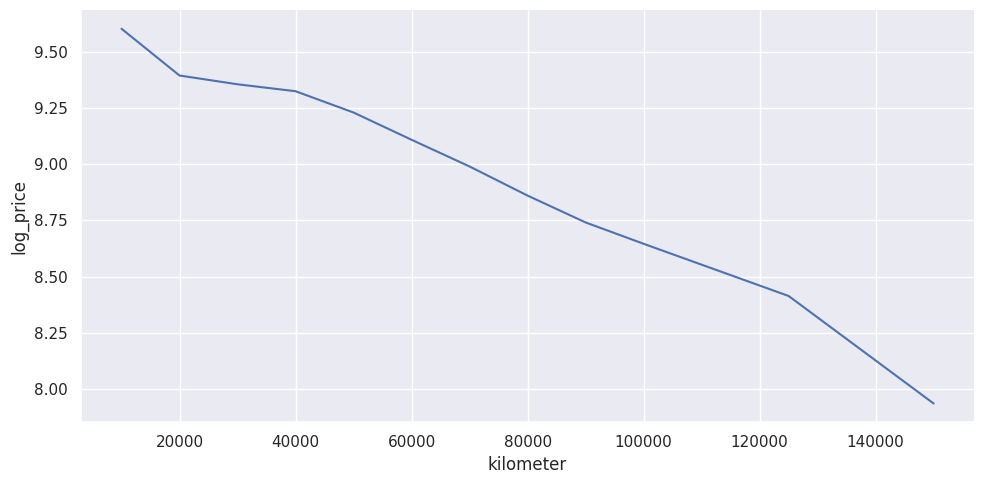

In [47]:
mean_km_log_price = data.groupby('kilometer')[['kilometer', 'log_price']].mean()
sns.relplot(data = mean_km_log_price, x = 'kilometer', y = 'log_price', aspect = 2, kind = 'line');

Так выглядит лучше)

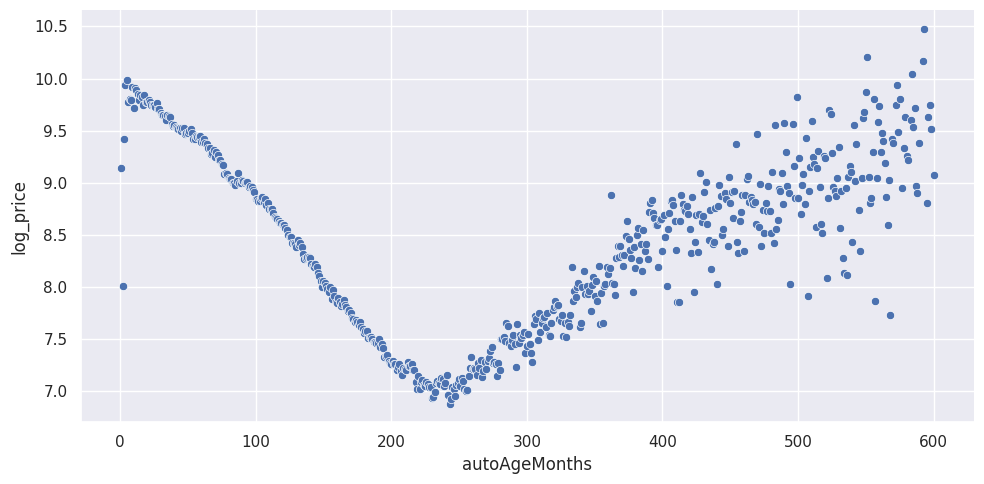

In [48]:
mean_age_log_price = data.groupby('autoAgeMonths')[['autoAgeMonths', 'log_price']].mean()
sns.relplot(data = mean_age_log_price, x = 'autoAgeMonths', y = 'log_price', aspect = 2);

Тут явно выделяются два участка, можно разделить на старые и молодые машины

In [49]:
data['young'] = np.where(data['autoAgeMonths'] < 230, 1, 0)

Введём бинарный признак young, 1 если младше 230 месяцев, 0 иначе

In [50]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'young']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

In [51]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [53]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split
np.random.seed(213)
x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_test_val, y_test_val, test_size=0.5)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [54]:
# YOUR CODE:
from sklearn.metrics import r2_score
lambda_values = np.logspace(-5, 0, 6)
lambda_values

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [55]:
def get_bests(d_config, x_train, y_train, x_val, y_val, lambda_values):
  best_lambda = None
  best_loss = np.Inf
  best_iter = None

  for lambda_ in lambda_values:
    d_config['kwargs']['lambda_'] = lambda_
    model = LinearRegression(descent_config = d_config)
    model.fit(x_train, y_train)
    loss = model.calc_loss(x_val, y_val)
    if loss < best_loss:
      best_loss = loss
      best_iter = len(model.loss_history)
      best_lambda = lambda_

  return best_loss, best_iter, best_lambda

In [56]:
def descend(d_config, x_train, y_train, x_test, y_test):
  model = LinearRegression(descent_config = d_config)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  loss = model.calc_loss(x_test, y_test)
  r2 = r2_score(y_test, y_pred)

  return loss, r2, model.loss_history

Descends

In [131]:
descends = ['full', 'stochastic', 'momentum', 'adam']
best_map = {}
for des in descends:
  dim = x_train.shape[1]
  descent_config = {
      'descent_name' : des,
      'kwargs' : {
          'dimension' : dim,
      }
  }
  best_loss, best_iter, best_lambda = get_bests(descent_config, x_train, y_train.to_numpy(), x_val, y_val.to_numpy(), lambda_values)
  best_map[des] = {'best_loss' : best_loss, 'best_iter' : best_iter, 'best_lambda' : best_lambda}
  if des == 'full':
    print('Vanilla descend')
    print(f"lambda : {best_lambda}")
    print(f"loss : {best_loss}")
    print(f"iteration number : {best_iter}\n")
  else:
    print(f"{des} descend")
    print(f"lambda : {best_lambda}")
    print(f"loss : {best_loss}")
    print(f"iteration number : {best_iter}\n")

Vanilla descend
lambda : 1.0
loss : 0.2859393781989786
iteration number : 43

stochastic descend
lambda : 0.1
loss : 0.5802294218418171
iteration number : 29

momentum descend
lambda : 0.1
loss : 0.30081985187065247
iteration number : 77

adam descend
lambda : 1.0
loss : 0.2642634696382829
iteration number : 75



Тесты

In [132]:
descends = ['full', 'stochastic', 'momentum', 'adam']
test_map = {}
loss_total = []
for des in descends:
  dim = x_train.shape[1]
  descent_config = {
      'descent_name' : des,
      'kwargs' : {
          'dimension' : dim,
          'lambda_' : best_map[des]['best_lambda']
      }
  }

  loss, r2, loss_history = descend(descent_config, x_train, y_train.to_numpy(), x_test, y_test.to_numpy())
  test_map[des] = {'loss' : loss, 'r2' : r2, 'loss_history' : loss_history}

  print(f"{des} test_loss: {loss}")
  print(f"{des} r2_score: {r2}\n")

full test_loss: 0.29526436858075117
full r2_score: 0.7411542281571997

stochastic test_loss: 0.6372755008680103
stochastic r2_score: 0.4413275476090034

momentum test_loss: 0.4137955862748391
momentum r2_score: 0.6372429276539617

adam test_loss: 0.26767006917387254
adam r2_score: 0.7653449822355448



### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

<Figure size 1000x600 with 0 Axes>

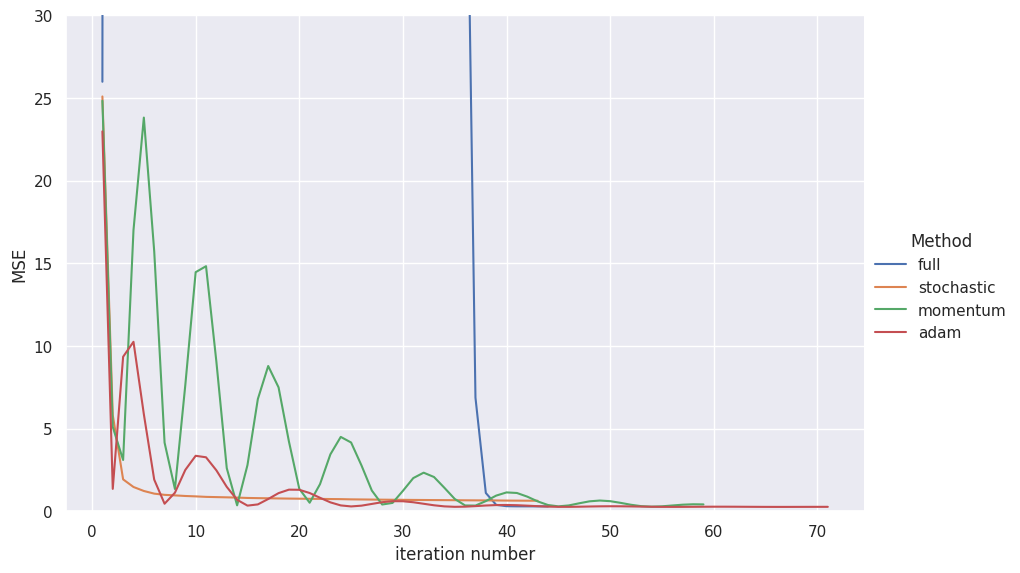

In [184]:
# YOUR CODE:
df_list = []
for method, values in test_map.items():
    df_graph = pd.DataFrame({'Iteration': range(1, len(values['loss_history']) + 1), 'Loss': values['loss_history'], 'Method': method})
    df_list.append(df_graph)

df_graph = pd.concat(df_list)

plt.figure(figsize=(10, 6))
g = sns.relplot(x='Iteration', y='Loss', hue='Method', kind='line', data=df_graph, height=6, aspect=1.5)
g.set(ylim=(0, 30), xlabel="iteration number", ylabel="MSE")
plt.show();

Тут попроси chatgpt сгененрить, потому что не рисовалось никак само(((( Попросил на одном графике нарисовать мапу, в которой мапа со списками

`### ваше решение тут ###`

Самый высокий R2 показал Adam (0.76). Loss падал быстрее всего у стохастического спуска, на втором месте Адам. У momentum очень долго сходился loss. Странно ведёт себя классический ГС, loss быстро вырос и очень быстро (быстрее всех сошёлся)

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [185]:
batch_sizes = np.arange(5, 500, 10)
import time

# YOUR CODE:
def test_batch_desc(x, y, batch_size, k=10):
  iter = 0
  iter_lst = []
  time_lst = []
  d_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': best_map['stochastic']['best_loss'],
            'batch_size': batch_size
        }
    }
  for _ in range(k):
    start = time.time()
    model = LinearRegression(descent_config = d_config)
    model.fit(x, y.to_numpy())
    end = time.time()
    iter_lst.append(len(model.loss_history))
    tot_time = end - start
    time_lst.append(tot_time)

  mean_time = np.mean(time_lst)
  mean_iter = np.mean(iter_lst)

  return mean_time, mean_iter

In [186]:
mean_time_lst = []
mean_iter_lst = []

for batch_size in batch_sizes:
  mean_time, mean_iter = test_batch_desc(x_train, y_train, batch_size)
  mean_time_lst.append(mean_time)
  mean_iter_lst.append(mean_iter)

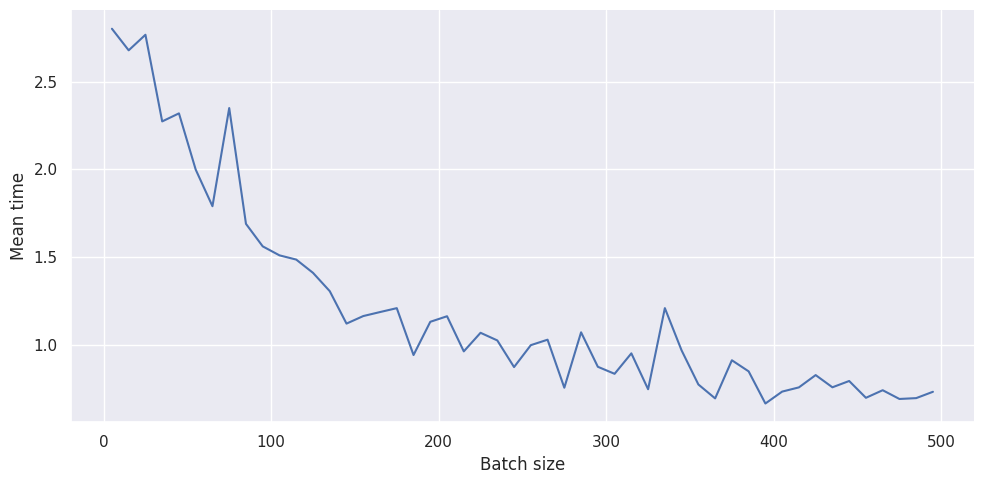

In [187]:
sns.relplot(x = batch_sizes, y = mean_time_lst, kind = 'line', aspect = 2)
plt.ylabel('Mean time')
plt.xlabel('Batch size');

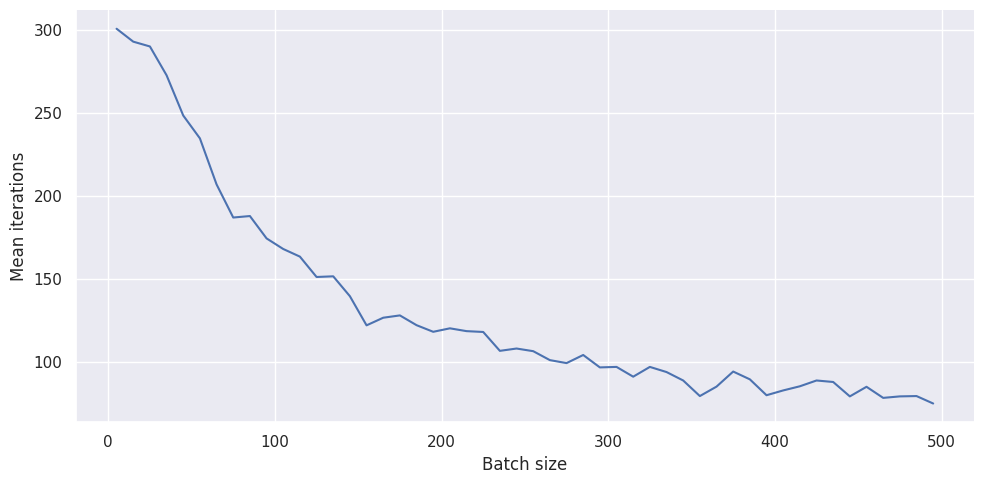

In [188]:
sns.relplot(x = batch_sizes, y = mean_iter_lst, kind = 'line', aspect = 2)
plt.ylabel('Mean iterations')
plt.xlabel('Batch size');

С ростом батча падает число итераций для сходимости и уменьшается среднее время. Начиная где-то со 150-160 скорость изменения падает, поэтому может не иметь смысла брать слишком большой батч.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/96769286/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [89]:
lambdas = np.logspace(-5, 0, 6)
mu_values = np.append(np.logspace(-5, -3, 3), np.append([0], np.logspace(0, 1, 3)))

In [190]:
# YOUR CODE:
def get_bests_with_mu(d_config, x_train, y_train, x_val, y_val, lambda_values, mu_values):
  best_lambda = None
  best_loss = np.Inf
  best_iter = None
  best_mu = None
  num = 0

  for lambda_ in lambda_values:
    for mu in mu_values:
      num += 1
      d_config['kwargs']['lambda_'] = lambda_
      d_config['kwargs']['mu'] = mu
      model = LinearRegression(descent_config = d_config)
      model.fit(x_train, y_train)
      loss = model.calc_loss(x_val, y_val)
      if loss < best_loss:
        best_loss = loss
        best_iter = len(model.loss_history)
        best_lambda = lambda_
        best_mu = mu

  return best_loss, best_iter, (best_lambda, best_mu)

In [191]:
descends = ['full', 'stochastic', 'momentum', 'adam']
best_reg_map = {}
for des in descends:
  dim = x_train.shape[1]
  descent_config = {
      'descent_name' : des,
      'regularized' : True,
      'kwargs' : {
          'dimension' : dim,
      }
  }
  best_loss, best_iter, best_lambda_and_mu = get_bests_with_mu(descent_config, x_train, y_train.to_numpy(), x_val, y_val.to_numpy(), lambda_values, mu_values)
  best_reg_map[des] = {'best_reg_loss' : best_loss, 'best_reg_iter' : best_iter, 'best_reg_lambda_and_mu' : best_lambda_and_mu}
  if des == 'full':
    print('Vanilla descend')
    print(f"reg lambda and mu: {best_lambda_and_mu}")
    print(f"reg loss : {best_loss}")
    print(f"reg iteration number : {best_iter}\n")
  else:
    print(f"{des} descend")
    print(f"reg lambda and mu: {best_lambda_and_mu}")
    print(f"reg loss : {best_loss}")
    print(f"reg iteration number : {best_iter}\n")

Vanilla descend
reg lambda and mu: (1.0, 0.0)
reg loss : 0.29613057086137734
reg iteration number : 52

stochastic descend
reg lambda and mu: (0.1, 1e-05)
reg loss : 0.6205962265400163
reg iteration number : 43

momentum descend
reg lambda and mu: (1.0, 0.0)
reg loss : 0.2726256371354181
reg iteration number : 112

adam descend
reg lambda and mu: (1.0, 1e-05)
reg loss : 0.26164050426075214
reg iteration number : 88



Для тестов функция не меняется

In [192]:
descends = ['full', 'stochastic', 'momentum', 'adam']
test_reg_map = {}
for des in descends:
  dim = x_train.shape[1]
  descent_config = {
      'descent_name' : des,
      'regularized' : True,
      'kwargs' : {
          'dimension' : dim,
          'lambda_' : best_reg_map[des]['best_reg_lambda_and_mu'][0],
          'mu' : best_reg_map[des]['best_reg_lambda_and_mu'][1]
      }
  }

  loss, r2, loss_history = descend(descent_config, x_train, y_train.to_numpy(), x_test, y_test.to_numpy())
  test_reg_map[des] = {'reg loss' : loss, 'reg_r2' : r2, 'loss_history' : loss_history}

  print(f"{des} test_reg_loss: {loss}")
  print(f"{des} reg_r2_score: {r2}\n")

full test_reg_loss: 0.305973877015951
full reg_r2_score: 0.7317656555018163

stochastic test_reg_loss: 0.7295859402315441
stochastic reg_r2_score: 0.3604028934048604

momentum test_reg_loss: 0.27325010993405874
momentum reg_r2_score: 0.7604531967335306

adam test_reg_loss: 0.26521740912728825
adam reg_r2_score: 0.7674951254644



`### ваше решение тут ###`

с графиками оказалось всё проще, чем я делал до этого)))))))

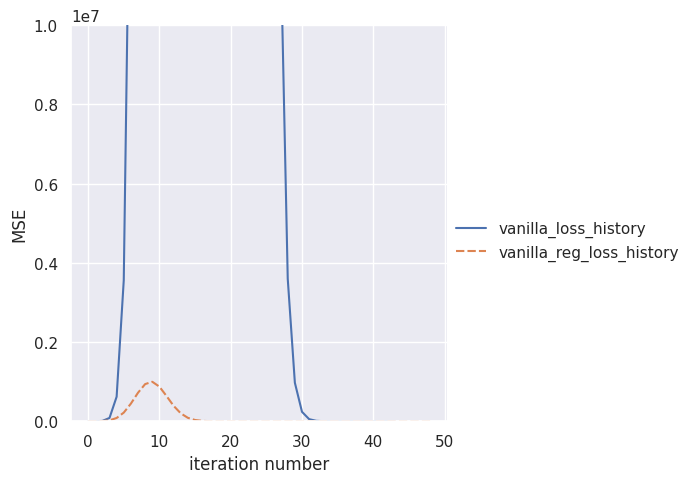

In [193]:
vanilla = sns.relplot({
    'vanilla_loss_history' : test_map['full']['loss_history'],
    'vanilla_reg_loss_history' : test_reg_map['full']['loss_history']
}, kind = 'line')
vanilla.set(ylim=(0, 10000000), xlabel="iteration number", ylabel="MSE")
plt.show()

Без регуляризации loss 0.29, R2 0.74, с - 0.3 и 0.735 соответственно. При регуляризации ошибки немного выросли, а R2 немного упал, но зато значительно уменьшилось число шагов до сходимости (видно по графику). Модель немного прибавила в качестве

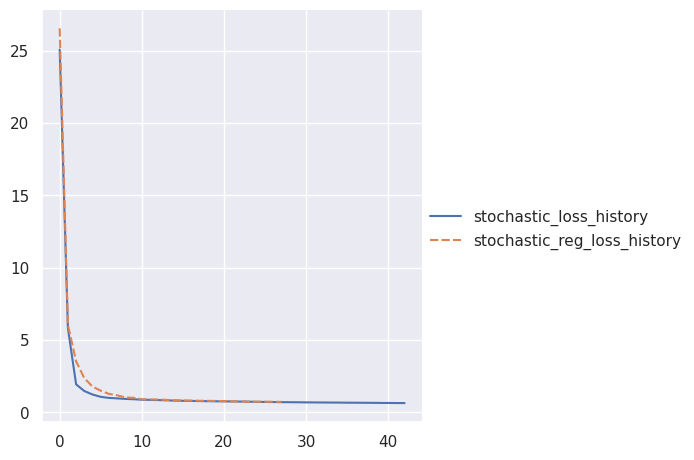

In [194]:
sns.relplot({
    'stochastic_loss_history' : test_map['stochastic']['loss_history'],
    'stochastic_reg_loss_history' : test_reg_map['stochastic']['loss_history']
}, kind = 'line');

В стохастическом loss 0.57, R2 0.50, после регуляризации - 0.67 и 0.41. Модель стала немного хуже, но не особо существенно заметно изменение, они примерно одинаковы

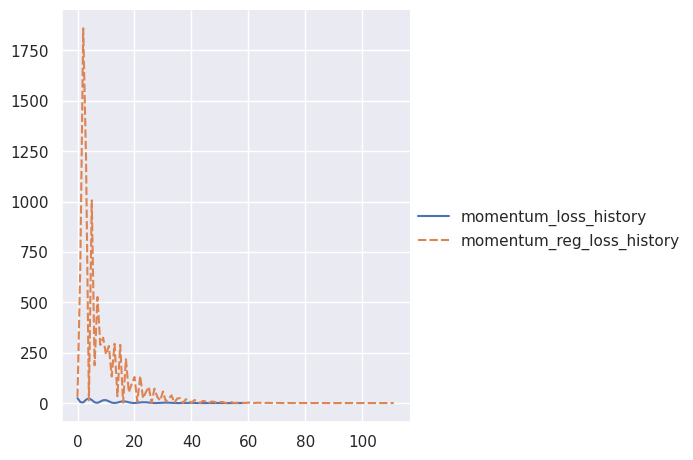

In [195]:
sns.relplot({
    'momentum_loss_history' : test_map['momentum']['loss_history'],
    'momentum_reg_loss_history' : test_reg_map['momentum']['loss_history']
}, kind = 'line');

В momentum test_loss 0.31, R2 0.725, после регуляризации - 0.298 и 0.738. По графику видно, что сильно увеличилось количество шагов до сходимости, зато R2 и test_loss стали лучше. Это говорит о том, что регуляризация помогла!

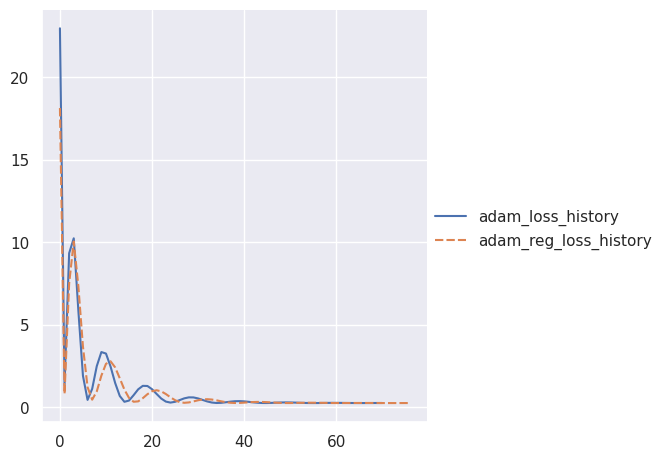

In [196]:
sns.relplot({
    'adam_loss_history' : test_map['adam']['loss_history'],
    'adam_reg_loss_history' : test_reg_map['adam']['loss_history']
}, kind = 'line');

В методе Adam test_loss 0.2668 и R2 0.7669, а после регуляризации - 0.2656 и 0.7671. Test_loss и R2 немного улучшились и чуть уменьшилось число итераций, что говорит о том, что регуляризация помогла, но не сильно)


## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right) = \log\left(\cosh(Xw - y)\right)
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

Легко заметить, что
$$
  \nabla_w L(y, X, w) = tanh (y-Xw)(-X)
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [57]:
# YOUR CODE:
from descents import LossFunction
lambda_values = np.logspace(-5, 0, 6)
lambda_values

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [58]:
descends = ['full', 'stochastic', 'momentum', 'adam']
best_logcosh_map = {}
for des in descends:
  dim = x_train.shape[1]
  descent_config = {
      'descent_name' : des,
      'kwargs' : {
          'dimension' : dim,
          'loss_function' : LossFunction.MSE
      }
  }
  best_logcosh_loss, best_logcosh_iter, best_logcosh_lambda = get_bests(descent_config, x_train, y_train.to_numpy(), x_val, y_val.to_numpy(), lambda_values)
  best_logcosh_map[des] = {'best_loss' : best_logcosh_loss, 'best_iter' : best_logcosh_iter, 'best_lambda' : best_logcosh_lambda}
  if des == 'full':
    print('Vanilla descend')
    print(f"lambda : {best_logcosh_lambda}")
    print(f"loss : {best_logcosh_loss}")
    print(f"iteration number : {best_logcosh_iter}\n")
  else:
    print(f"{des} descend")
    print(f"lambda : {best_logcosh_lambda}")
    print(f"loss : {best_logcosh_loss}")
    print(f"iteration number : {best_logcosh_iter}\n")

Vanilla descend
lambda : 1.0
loss : 0.2859393781989786
iteration number : 43

stochastic descend
lambda : 0.1
loss : 0.5802294218418171
iteration number : 29

momentum descend
lambda : 0.1
loss : 0.30081985187065247
iteration number : 77

adam descend
lambda : 1.0
loss : 0.2642634696382829
iteration number : 75





Тесты

In [59]:
descends = ['full', 'stochastic', 'momentum', 'adam']
test_logcosh_map = {}
loss_total = []
for des in descends:
  dim = x_train.shape[1]
  descent_config = {
      'descent_name' : des,
      'kwargs' : {
          'dimension' : dim,
          'lambda_' : best_logcosh_map[des]['best_lambda'],
          'loss_function' : LossFunction.LogCosh
      }
  }

  loss_logcosh, r2_logcosh, loss_history_logcosh = descend(descent_config, x_train, y_train.to_numpy(), x_test, y_test.to_numpy())
  test_logcosh_map[des] = {'loss' : loss_logcosh, 'r2' : r2_logcosh, 'loss_history' : loss_history_logcosh}

  print(f"{des} test_loss: {loss_logcosh}")
  print(f"{des} r2_score: {r2_logcosh}\n")

/content/descents.py:93: RuntimeWarning: overflow encountered in cosh
  loss = np.sum(np.log1p(np.cosh(x @ self.w - y)))


full test_loss: inf
full r2_score: -21016298615602.79

stochastic test_loss: 3031604.572923342
stochastic r2_score: -15674.558661752235



/content/descents.py:93: RuntimeWarning: overflow encountered in cosh
  loss = np.sum(np.log1p(np.cosh(x @ self.w - y)))


momentum test_loss: inf
momentum r2_score: -20338161688450.883

adam test_loss: 5396460.967268581
adam r2_score: -49693.77505433293



Ничего не работает, но я норм всё пишу, честно. Там loss LogCosh должен быть меньше, чем MSE вроде

<img src = 'https://i.pinimg.com/474x/f7/b0/c6/f7b0c6784994a52e8ff3fbce07d71cde.jpg'>

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

<img
src = 'https://drive.google.com/file/d/1_s0ctwIZfuwlvSHDcem_A2YpBIwQaT6_/view?usp=sharing'
alt = 'https://drive.google.com/file/d/1_s0ctwIZfuwlvSHDcem_A2YpBIwQaT6_/view?usp=sharing'>

Человек доволен, но его не видно. На фото яичница с грибами и тост. Для этого я взбил желтки, пожарил грибы, залил яйца на сковородку, посолил, поперчил, пожарил тост и колбасу. Всё соединяешь и получается вкусно)

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [60]:
# YOUR CODE:
class AMSGrad(VanillaGradientDescent):

  def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.eps: float = 1e-8

        self.m: np.ndarray = np.zeros(dimension)
        self.v: np.ndarray = np.zeros(dimension)
        self.v_hat_max: np.ndarray = np.zeros(dimension)

        self.beta_1: float = 0.9
        self.beta_2: float = 0.999

        self.iteration: int = 0

  def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        # TODO: implement updating weights function
        self.m = self.beta_1 * self.m + (1-self.beta_1) * gradient
        self.v = self.beta_2 * self.v + (1-self.beta_2) * np.square(gradient)

        self.v_hat_max = np.maximum(self.v_hat_max, self.v)

        m_hat = self.m/(1- np.power(self.beta_1, self.iteration + 1))
        v_hat = self.v_hat_max/(1- np.power(self.beta_2, self.iteration + 1))

        self.iteration += 1

        w_old = self.w.copy()
        self.w = w_old - self.lr() * m_hat / (np.sqrt(v_hat) + self.eps)
        weight_diff = self.w - w_old

        return weight_diff

AMSGrad похож на Adam, но есть v_hat_max

In [69]:
best_map = {}
dim = x_train.shape[1]
descent_config = {
    'descent_name' : 'amsg',
    'kwargs' : {
        'dimension' : dim,
    }
}
best_loss, best_iter, best_lambda = get_bests(descent_config, x_train, y_train.to_numpy(), x_val, y_val.to_numpy(), lambda_values)
best_map['amsg'] = {'best_loss' : best_loss, 'best_iter' : best_iter, 'best_lambda' : best_lambda}
print(f"AMSGrad descend")
print(f"lambda : {best_lambda}")
print(f"loss : {best_loss}")
print(f"iteration number : {best_iter}\n")

AMSGrad descend
lambda : 1.0
loss : 0.2639808454825494
iteration number : 76



In [71]:
test_map = {}
dim = x_train.shape[1]
descent_config = {
    'descent_name' : 'amsg',
    'kwargs' : {
        'dimension' : dim,
        'lambda_' : best_map['amsg']['best_lambda']
    }
}

loss, r2, loss_history = descend(descent_config, x_train, y_train.to_numpy(), x_test, y_test.to_numpy())
test_map['amsg'] = {'loss' : loss, 'r2' : r2, 'loss_history' : loss_history}

print(f"AMSGrad test_loss: {loss}")
print(f"AMSGrad r2_score: {r2}\n")

AMSGrad test_loss: 0.2641286991682811
AMSGrad r2_score: 0.7684495513946494



AMSGrad выдаёт минимальный loss и test_loss (у Adam почти такой же, но немного больше). В добавок к этому у данного метода максимальный среди всех R2! Пока что это лучшая модель, однако её проблема в том, что она требует много итераций до сходимости

In [73]:
best_map['amsg']

{'best_loss': 0.2639808454825494, 'best_iter': 76, 'best_lambda': 1.0}

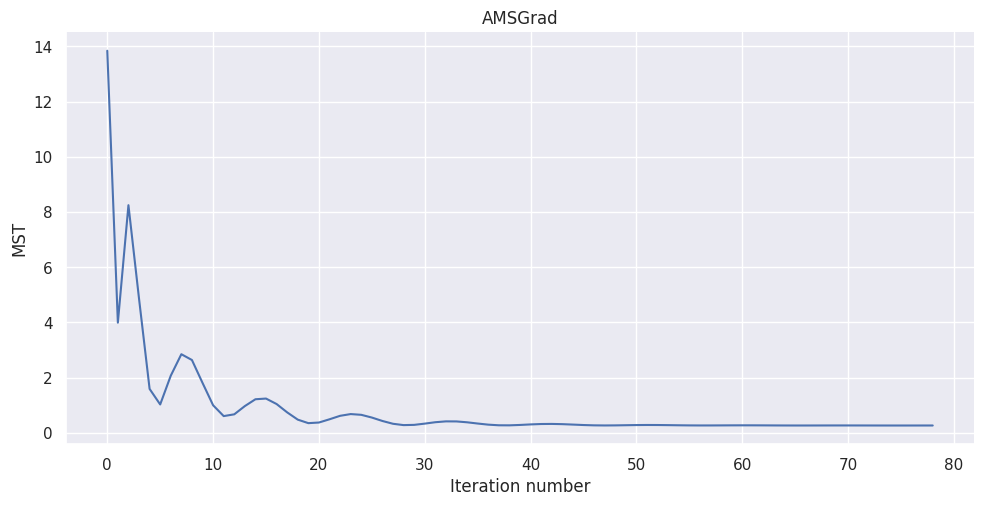

In [78]:
sns.relplot(loss_history, kind = 'line', aspect = 2)
plt.xlabel('Iteration number')
plt.ylabel('MST')
plt.title('AMSGrad');